In [ ]:
#Membaca file csv
import pandas as pd
df =pd.read_csv('alasan nonton video.csv',sep=';')

In [ ]:
df

,Text
0,iklannya lucu atau lagi gabut aja
1,"Terkadang ga sadar kalau itu iklan, kadang nge..."
2,Karna durasi yg ditentukan
3,"menarik, yang iklannya nggak lama"
4,karena tidak bisa di skip
...,...
67,tidak ada
68,tidak ada
69,Tertarik
70,"Kadang kepo, ada iklan yg di 5 detik awal tera..."


In [ ]:
df['Text']=df['Text'].str.replace('(?:\@|https?\://)\S+', '')
df['Text']=df['Text'].str.replace('[^\w\s]',' ')
#ilangin angka
df['Text']=df['Text'].str.replace('\d+',' ')
#ilangin enter
df['Text']=df['Text'].str.lower()
#ilangin spasi berlebih
df['Text'] = df['Text'].replace('\s+', ' ', regex=True)
#ilangin simbol
df['Text'] = df['Text'].replace('\n',' ',regex=True)

In [ ]:
df

,Text
0,iklannya lucu atau lagi gabut aja
1,terkadang ga sadar kalau itu iklan kadang ngel...
2,karna durasi yg ditentukan
3,menarik yang iklannya nggak lama
4,karena tidak bisa di skip
...,...
67,tidak ada
68,tidak ada
69,tertarik
70,kadang kepo ada iklan yg di detik awal terasa ...


In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

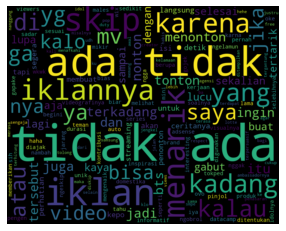

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
stop = {'sih','wkwk','hehe','haha','ya','kali','atau','nya'}
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
df

,Text
0,iklannya lucu lagi gabut aja
1,terkadang ga sadar kalau itu iklan kadang ngel...
2,karna durasi yg ditentukan
3,menarik yang iklannya nggak lama
4,karena tidak bisa di skip
...,...
67,tidak ada
68,tidak ada
69,tertarik
70,kadang kepo ada iklan yg di detik awal terasa ...


In [ ]:
df = df.rename(columns={'Text':'Alasan_Menonton_Video'})

In [ ]:
#Menyimpan file
df.to_csv('belumDiTambahStopword1.csv',columns=['Alasan_Menonton_Video'],index=False)

In [ ]:
df=df.dropna()

In [ ]:
slang = {"ga":"tidak", "gabut":"bosan", "ngelamun":"melamun", "karna":"karena", "mv":"music video", "interesting":"menarik","males":"malas","ku":"aku","ya kali":"mana mungkin","kalo":"kalau","biar":"agar", "nambah":"bertambah", "mikir":"dipikir", "gapake":"tidak pakai", "yg":"yang", "nggak":"tidak", "ngeskip":"melewati", "diskip":"dilewati","smpe":"sampai","kepo":"penasaran","klo":"kalau","soalnya":"karena","ngga":"tidak","udh":"udah","sampai":"hingga","jadi":"menjadi","kaya":"seperti","begini":"seperti ini"}

In [ ]:
df['Alasan_Menonton_Video'] = df['Alasan_Menonton_Video'].apply(lambda x: ' '.join(slang.get(word, word) for word in x.split()))

In [ ]:
df

,Alasan_Menonton_Video
0,iklannya lucu lagi bosan aja
1,terkadang tidak sadar kalau itu iklan kadang m...
2,karena durasi yang ditentukan
3,menarik yang iklannya tidak lama
4,karena tidak bisa di skip
...,...
67,tidak ada
68,tidak ada
69,tertarik
70,kadang penasaran ada iklan yang di detik awal ...


In [ ]:
#Menyimpan file
df.to_csv('sudahDiTambahStopword.csv',columns=['Alasan_Menonton_Video'],index=False)